In [1]:
with open('test.txt', 'r', encoding='utf-8') as f:
    lines = []
    file_data = f.readlines()
    for line in file_data:
        line = line.replace("\n", "")
        line = line.replace(".", "")
        line = line.replace(",", "")
        line = line.replace(":", "")
        line = line.replace("[", "")
        line = line.replace("]", "")
        line = line.replace("(", "")
        line = line.replace(")", "")
        line = line.replace("*", "")
        line = line.replace("?", "")
        line = line.replace("!", "")
        line = line.replace("’", "")
        line = line.replace("‘", "")
        line = line.replace("“", "")
        line = line.replace("”", "")
        line = line.replace(";", "")
        line = line.replace("—", "")
        line = line.replace("_", "")
        line = line.replace("…", "")
        line = line.replace("#", "")
        line = line.replace("/", "")
        line = line.replace("\"", "")
        line = line.replace("\'", "")
        line = line.replace("$", "")
        line = line.replace("", "")
        line = line.lower()
        if line:
            lines.append(line)

In [2]:
lines

['the project gutenberg ebook of the time machine by h g wells',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever you may copy it give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at',
 'wwwgutenbergorg if you are not located in the united states you',
 'will have to check the laws of the country where you are located before',
 'using this ebook',
 'title the time machine',
 'author h g wells',
 'release date july 1992 ebook 35',
 'most recently updated october 22 2020',
 'language english',
 'character set encoding utf-8',
 ' start of the project gutenberg ebook the time machine ',
 'the time machine',
 'an invention',
 'by h g wells',
 'contents',
 ' i introduction',
 ' ii the machine',
 ' iii the time traveller returns',
 ' iv time travelling',
 ' v in the golden age',
 ' vi the sunset of mankind',
 ' vii a

In [3]:
def create_char_dict(lines):
    chars = {}
    char_dict = {}
    
    for sentence in lines:
        for char in sentence:
            if char not in chars:
                chars[char] = 1
            else:
                chars[char] += 1
                
    char_list = sorted(chars.items(), key=lambda x:x[1], reverse=True)
    
    char_dict["<eos>"] = 0
    
    ids = 1
    for char in char_list:
        char_dict[char[0]] = ids
        ids += 1
        
    return char_dict
            
def line_to_char_dict(line, chars):
    sentences = []
    for sentence in line:
        for char in sentence:
            if char in chars:
                sentences.append(chars[char])
    sentences.append(chars["<eos>"])
    return sentences

def sentence_to_char_dict(lines):
    chars = create_char_dict(lines)
    out = []
    for sentence in lines:
        out.append(line_to_char_dict(sentence, chars))
    return out

In [4]:
create_char_dict(lines)

{'<eos>': 0,
 ' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'i': 5,
 'o': 6,
 'n': 7,
 's': 8,
 'r': 9,
 'h': 10,
 'd': 11,
 'l': 12,
 'm': 13,
 'u': 14,
 'c': 15,
 'f': 16,
 'w': 17,
 'g': 18,
 'y': 19,
 'p': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 '-': 25,
 'j': 26,
 'z': 27,
 'q': 28,
 '1': 29,
 '0': 30,
 '3': 31,
 '5': 32,
 '2': 33,
 '8': 34,
 '9': 35,
 '4': 36,
 '6': 37,
 'æ': 38,
 '7': 39,
 'œ': 40,
 'ü': 41,
 'ç': 42,
 '%': 43}

In [5]:
sentence_to_char_dict(lines)

[[3,
  10,
  2,
  1,
  20,
  9,
  6,
  26,
  2,
  15,
  3,
  1,
  18,
  14,
  3,
  2,
  7,
  21,
  2,
  9,
  18,
  1,
  2,
  21,
  6,
  6,
  23,
  1,
  6,
  16,
  1,
  3,
  10,
  2,
  1,
  3,
  5,
  13,
  2,
  1,
  13,
  4,
  15,
  10,
  5,
  7,
  2,
  1,
  21,
  19,
  1,
  10,
  1,
  18,
  1,
  17,
  2,
  12,
  12,
  8,
  0],
 [3,
  10,
  5,
  8,
  1,
  2,
  21,
  6,
  6,
  23,
  1,
  5,
  8,
  1,
  16,
  6,
  9,
  1,
  3,
  10,
  2,
  1,
  14,
  8,
  2,
  1,
  6,
  16,
  1,
  4,
  7,
  19,
  6,
  7,
  2,
  1,
  4,
  7,
  19,
  17,
  10,
  2,
  9,
  2,
  1,
  5,
  7,
  1,
  3,
  10,
  2,
  1,
  14,
  7,
  5,
  3,
  2,
  11,
  1,
  8,
  3,
  4,
  3,
  2,
  8,
  1,
  4,
  7,
  11,
  0],
 [13,
  6,
  8,
  3,
  1,
  6,
  3,
  10,
  2,
  9,
  1,
  20,
  4,
  9,
  3,
  8,
  1,
  6,
  16,
  1,
  3,
  10,
  2,
  1,
  17,
  6,
  9,
  12,
  11,
  1,
  4,
  3,
  1,
  7,
  6,
  1,
  15,
  6,
  8,
  3,
  1,
  4,
  7,
  11,
  1,
  17,
  5,
  3,
  10,
  1,
  4,
  12,
  13,
  6,
  8,
  3,
  1,
  7,
 

In [6]:
def create_word_dict(lines):
    words = {}
    vocabulary = {}
    
    for sentence in lines:
        sentence = sentence.split(" ")
        for word in sentence:
            if word:
                if word not in words:
                    words[word] = 1
                else:
                    words[word] += 1
    words_list = sorted(words.items(), key=lambda x:x[1], reverse=True)
    
    ids = 0
    for word in words_list:
        vocabulary[word[0]] = ids
        ids += 1
        
    return vocabulary

def line_to_word_dict(line, words):
    sentences = []
    line = line.split(" ")
    for word in line:
        if word:
            if word in words:
                sentences.append(words[word])
    return sentences

def sentence_to_word_dict(lines):
    words = create_word_dict(lines)
    out = []
    for sentence in lines:
        out.append(line_to_word_dict(sentence, words))
    return out


In [7]:
create_word_dict(lines)

{'the': 0,
 'and': 1,
 'of': 2,
 'i': 3,
 'a': 4,
 'to': 5,
 'in': 6,
 'was': 7,
 'that': 8,
 'my': 9,
 'it': 10,
 'had': 11,
 'me': 12,
 'as': 13,
 'with': 14,
 'at': 15,
 'for': 16,
 'time': 17,
 'you': 18,
 'but': 19,
 'this': 20,
 'or': 21,
 'were': 22,
 'on': 23,
 'not': 24,
 'from': 25,
 'all': 26,
 'then': 27,
 'his': 28,
 'have': 29,
 'by': 30,
 'is': 31,
 'there': 32,
 'they': 33,
 'he': 34,
 'so': 35,
 'upon': 36,
 'little': 37,
 'into': 38,
 'be': 39,
 'one': 40,
 'came': 41,
 'no': 42,
 'some': 43,
 'could': 44,
 'machine': 45,
 'an': 46,
 'their': 47,
 'we': 48,
 'said': 49,
 'project': 50,
 'which': 51,
 'saw': 52,
 'down': 53,
 'its': 54,
 'very': 55,
 'them': 56,
 'now': 57,
 'these': 58,
 'about': 59,
 'what': 60,
 'any': 61,
 'been': 62,
 'her': 63,
 'up': 64,
 'out': 65,
 'seemed': 66,
 'if': 67,
 'are': 68,
 'man': 69,
 'thing': 70,
 'like': 71,
 'white': 72,
 'our': 73,
 'again': 74,
 'more': 75,
 'must': 76,
 'would': 77,
 'traveller': 78,
 'when': 79,
 'felt': 80

In [8]:
#Q2
import torch
from torch.utils.data import Dataset, DataLoader


"""
char_num = len(create_char_dict(lines))

def line2vec(line, dic):
    vec = torch.zeros(len(line)+1, char_num)
    for i, char in enumerate(line):
        vec[i][dic[char]] = 1
    return vec

def lines2vec(lines):
    vec = []
    dic = create_char_dict(lines)
    for line in lines:
        vec.append(line2vec(line, dic))
    return vec
"""




class train_test_dataset(Dataset):
    def __init__(self, lines, train=True, partition=30):
        super().__init__()
        
        vector = sentence_to_char_dict(lines)
        
        train_data = vector[:int(len(vector)*0.9)]
        test_data = vector[int(len(vector)*0.9):]
        
        
        self.data,self.label = [],[]
        
        if train:
            self.data, self.label = self.create_dataset(train_data,partition)
        else:
            self.data, self.label = self.create_dataset(test_data,partition)
    
    def create_dataset(self, lines, length):
        data = []
        label = []
        for line in lines:
            if len(line) <= length:
                continue
            for i in range(len(line) - length):
                x = torch.as_tensor(line[i:i+length])
                x = x.reshape((1, -1))
                y = torch.as_tensor(line[i+length])
                data.append(x)
                label.append(y)
        return data, label
            
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index], self.label[index]

        

In [9]:
train_dataset = train_test_dataset(lines)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = train_test_dataset(lines, train=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [10]:
#Q3
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.n_layers = 1
        self.hidden_size = 32
        self.rnn = nn.RNN(in_size, self.hidden_size, self.n_layers)
        self.fc = nn.Linear(self.hidden_size, out_size)

    def forward(self, x):
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        x, hidden = self.rnn(x)
        x = F.relu(x)
        x = self.fc(x[:, -1])
        
        return x, hidden
    
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_size)
        
        return hidden

In [15]:
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

net = RNN(30,44)
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

best_score = 100.0
count = 0
stop = 5

epoch_num = 1000
running_loss = np.zeros(epoch_num)
train_acc = np.zeros(epoch_num)
train_perplexity = np.zeros(epoch_num)

for epoch in range(epoch_num):
    train_correct = 0
    train_count = 0
    
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        
        with torch.set_grad_enabled(True):
            outputs, h = net(inputs.float())
            loss = criterion(outputs, labels) 
            _, pred_label = torch.max(outputs, 1)
            perplexity = torch.exp(loss)
        loss.backward() 
        optimizer.step() 
        running_loss[epoch] += loss.item()
    
    train_correct += torch.sum(pred_label== labels.data).item()  
    train_count += labels.size(0)
    train_acc[epoch] = train_correct/train_count
  
    running_loss[epoch] /= len(train_loader)
    train_perplexity[epoch] += np.exp(running_loss[epoch])
    
    if running_loss[epoch] > best_score:
        count += 1
        print("count:", count)

    else:
        count = 0
        best_score = running_loss[epoch]

    if count >= stop:
        print("early stopping")
        break

    print("epoch : %d, train_loss : %.4lf, train_acc : %.4lf,  train_perplexity : %.4lf" 
          % (epoch, running_loss[epoch], train_acc[epoch], train_perplexity[epoch]))
    
test_acc = 0.0
correct = 0.0
count = 0.0
test_loss = 0.0
test_perplexity = 0.0

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        images, labels = data[0].to(device), data[1].to(device)
        outputs, h = net(images.float())
        loss = criterion(outputs, labels) 
        _, pred_label = torch.max(outputs.data, 1)
        test_loss += loss.item()
    
    correct += torch.sum(pred_label == labels.data).item()  
    count += labels.size(0)
    
test_acc = correct/count
test_perplexity += np.exp(test_loss/len(test_loader))
print("test_acc:%.4lf, test_perplexity:%.4lf" % (test_acc, test_perplexity))


cpu
epoch : 0, train_loss : 2.9145, train_acc : 0.1273,  train_perplexity : 18.4390
epoch : 1, train_loss : 2.7932, train_acc : 0.1818,  train_perplexity : 16.3329
epoch : 2, train_loss : 2.7531, train_acc : 0.3091,  train_perplexity : 15.6913
epoch : 3, train_loss : 2.7244, train_acc : 0.1091,  train_perplexity : 15.2478
epoch : 4, train_loss : 2.7065, train_acc : 0.2000,  train_perplexity : 14.9775
epoch : 5, train_loss : 2.6931, train_acc : 0.1455,  train_perplexity : 14.7778
epoch : 6, train_loss : 2.6820, train_acc : 0.2364,  train_perplexity : 14.6147
epoch : 7, train_loss : 2.6711, train_acc : 0.3091,  train_perplexity : 14.4559
epoch : 8, train_loss : 2.6622, train_acc : 0.1455,  train_perplexity : 14.3271
epoch : 9, train_loss : 2.6555, train_acc : 0.3636,  train_perplexity : 14.2316
epoch : 10, train_loss : 2.6497, train_acc : 0.2364,  train_perplexity : 14.1503
epoch : 11, train_loss : 2.6406, train_acc : 0.1636,  train_perplexity : 14.0218
epoch : 12, train_loss : 2.6340, t

count: 3
epoch : 99, train_loss : 2.4489, train_acc : 0.2909,  train_perplexity : 11.5760
epoch : 100, train_loss : 2.4469, train_acc : 0.2909,  train_perplexity : 11.5522
epoch : 101, train_loss : 2.4439, train_acc : 0.3091,  train_perplexity : 11.5175
count: 1
epoch : 102, train_loss : 2.4456, train_acc : 0.3091,  train_perplexity : 11.5373
count: 2
epoch : 103, train_loss : 2.4462, train_acc : 0.3091,  train_perplexity : 11.5447
count: 3
epoch : 104, train_loss : 2.4451, train_acc : 0.2727,  train_perplexity : 11.5313
epoch : 105, train_loss : 2.4426, train_acc : 0.2909,  train_perplexity : 11.5029
epoch : 106, train_loss : 2.4417, train_acc : 0.3818,  train_perplexity : 11.4921
epoch : 107, train_loss : 2.4410, train_acc : 0.3455,  train_perplexity : 11.4848
count: 1
epoch : 108, train_loss : 2.4421, train_acc : 0.3273,  train_perplexity : 11.4974
count: 2
epoch : 109, train_loss : 2.4414, train_acc : 0.3455,  train_perplexity : 11.4887
count: 3
epoch : 110, train_loss : 2.4422, tr

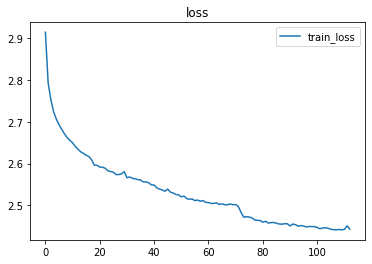

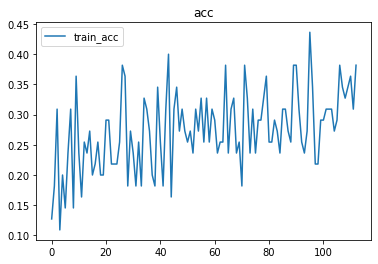

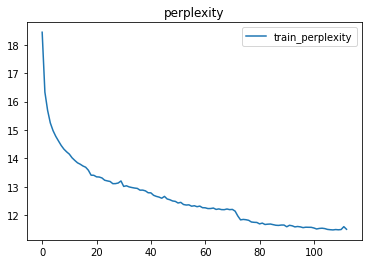

In [16]:
plt.figure()
plt.plot(running_loss[0:epoch+1], label = "train_loss")
plt.legend()
plt.title('loss')
plt.savefig('%s.png' % ("Q3_loss"))

plt.figure()
plt.plot(train_acc[0:epoch+1], label = "train_acc")
plt.legend()
plt.title('acc')
plt.savefig('%s.png' % ("Q3_acc"))

plt.figure()
plt.plot(train_perplexity[0:epoch+1], label = "train_perplexity")
plt.legend()
plt.title('perplexity')
plt.savefig('%s.png' % ("Q3_perplexity"))